# Key takeaways

from https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html 

1. score at 0.968
1. `svm.SVC(gamma=0.001)`, gamma ： ‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features
1. `for ax, image, label in zip(axes, digits.images, digits.target)`, zip参数的数组长度不一样的时候，取最短的数组为参考。如果最短的数组长度为3，那么返回的zip好的对象长度就为3.
    1. zip是一个生成器，迭代一次以后就结束了。下面的代码，第2次会打印0:
       ~~~python

        print(f"len(z): {len(list(z))}")
        print(f"len(z): {len(list(z))}")
       ~~~
1. `digits.images.reshape((n_samples, -1))`, 
    1. `-1`怎么理解？ 新的形状应该与原始形状兼容。如果是整数，则结果将是该长度的1-D数组。一个形状维度可以是`-1`。在这种情况下，从数组的长度和其余维度推断该值。
1. ax.set_axis_off() # 隐藏外框

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

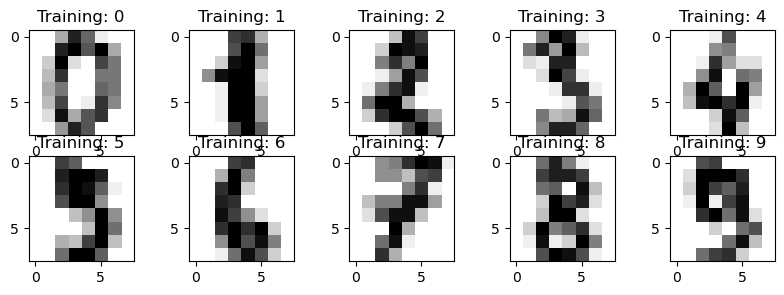

In [32]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes.flatten(), digits.images, digits.target):
    # ax.set_axis_off() # 隐藏外框
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    

In [29]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.5, shuffle=False
)

# Learn the gitis on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(f"score: {clf.score(X_test, y_test)}")

score: 0.9688542825361512


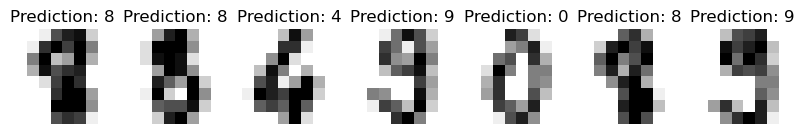

In [27]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off() # 隐藏外框
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


# Zip
如果数组长度不一样，zip会发生什么？
1. 以最短的数组为标准
1. 返回的是生成器，不能重复使用。


In [14]:
ax = [1,2,3,4]
labels = ["1", "2", "3", "4", "5", "6", "7", "8"]


z = zip(ax, labels)


for a,l in z:
    print(f"a: {a}, z: {l}")
    
print(f"len(z): {len(list(z))}")
print(f"len(z): {len(list(z))}")

a: 1, z: 1
a: 2, z: 2
a: 3, z: 3
a: 4, z: 4
len(z): 0
len(z): 0
